# C3M2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply Poisson Regression to real data.
2. Learn and practice working with and interpreting Poisson Regression Models.
3. Understand deviance and how to conduct hypothesis tests with Poisson Regression.
4. Recognize when a model shows signs of overdispersion.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [21]:
# Load the required packages
library(MASS)
library(tidyverse)

# Problem 1: Poisson Estimators

Let $Y_1,...,Y_n \overset{i}{\sim} Poisson(\lambda_i)$. Show that, if $\eta_i = \beta_0$, then the maximum likelihood estimator of $\lambda_i$ is $\widehat\lambda_i = \bar{Y}$, for all $i=1,...,n$.

The likelihood function for a Poisson distribution is 
$$P(Y_i=y_i)=\frac{e^{-\lambda_i}\lambda_i^{y_i}}{y_i!}, y_i = 1,2,...,\lambda_i$$. 

The joint PMF is $$f(y_i,\lambda)=\prod^{n}_{i=1}\frac{e^{-\lambda_i}\lambda_i^{y_i}}{y_i!}$$ 

From the above, we can write the likelihood function as a function of the parameters using the link function an exponentiation. The link function takes the log of the rate parameter and sends the mean to the linear predictor.
$$\eta_i = g(\lambda_i) = \log(\lambda_i) \implies \lambda_i = e^{\eta_i} = e^{\beta_0+\beta_ix_i}$$


$$L(\beta)=\prod^{n}_{i=1}\frac{e^{-\lambda_i}\lambda_i^{y_i}}{y_i!}=\prod^{n}_{i=1}\frac{e^{y_i\eta_i-e^{\eta_i}}}{y_i!}$$ 

and the log-likelihood function is $$l(\beta)=\sum^{n}_{i=1}[y_i\eta_i-e^{\eta_i} - \log(y_i!)]$$

Finally, taking the derivative of the log-likelihood function and solving for when it is equal to zero maximizes the function and we get: $$\frac{\partial l(\beta)}{\partial e^{\eta_i}} = \frac{\partial L(\beta)}{\partial\lambda_i} = -n + \frac{1}{\lambda}\sum_{i=1}^{n}x_i = 0 \implies \lambda = \frac{1}{n}\sum_{i=1}^{n}x_i$$ or in other words, the mean.

# Problem 2: Ships data

The ships dataset gives the number of damage incidents and aggregate months of service for different types of ships broken down by year of construction and period of operation. 

The code below splits the data into a training set (80% of the data) and a test set (the remaining 20%).

In [22]:
data(ships)
ships = ships[ships$service != 0,]
ships$year = as.factor(ships$year)
ships$period = as.factor(ships$period)

set.seed(11)
n = floor(0.8 * nrow(ships))
index = sample(seq_len(nrow(ships)), size = n)

train = ships[index, ]
test = ships[-index, ]
head(train)
summary(train)

,type,year,period,service,incidents
,<fct>,<fct>,<fct>,<int>,<int>
40,E,75,75,542,1
28,D,65,75,192,0
18,C,60,75,552,1
19,C,65,60,781,0
5,A,70,60,1512,6
32,D,75,75,2051,4


 type  year   period     service          incidents    
 A:5   60:7   60:11   Min.   :   45.0   Min.   : 0.00  
 B:5   65:8   75:16   1st Qu.:  318.5   1st Qu.: 0.50  
 C:6   70:8           Median : 1095.0   Median : 2.00  
 D:7   75:4           Mean   : 5012.2   Mean   :10.63  
 E:4                  3rd Qu.: 2202.5   3rd Qu.:11.50  
                      Max.   :44882.0   Max.   :58.00  

### 2. (a) Poisson Regression Fitting

Use the training set to develop an appropriate regression model for `incidents`, using `type`, `period`, and `year` as predictors (HINT: is this a count model or a rate model?).

Calculate the mean squared prediction error (MSPE) for the test set. Display your results.

In [23]:
# Your Code Here
glmod.ships = glm(incidents ~ type + period + year, data = train, family = poisson)
summary(glmod.ships)


Call:
glm(formula = incidents ~ type + period + year, family = poisson, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0775  -1.9869  -0.0418   0.7612   3.6618  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5644     0.2199   7.113 1.13e-12 ***
typeB         1.6795     0.1889   8.889  < 2e-16 ***
typeC        -2.0789     0.4408  -4.717 2.40e-06 ***
typeD        -1.1551     0.2930  -3.943 8.06e-05 ***
typeE        -0.5113     0.2781  -1.839   0.0660 .  
period75      0.4123     0.1282   3.216   0.0013 ** 
year65        0.4379     0.1885   2.324   0.0201 *  
year70        0.2260     0.1916   1.180   0.2382    
year75        0.1436     0.3147   0.456   0.6481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 109.21  on 18  degrees of freedom
AIC: 200.92

Numbe

<span style="color:orange">
Above you can see the generalized linear regression model for incidents, using type, period, and year as predictors. The model is a count model, so it implements poisson regression. From the summary, you can see that the years are not significant predictors.

</span>

In [24]:
mean((test$incidents - predict.glm(glmod.ships, test)) ^ 2)

[1] 133.236

<span style="color:orange">
Above you can see the MSPE is 133.

</span>.

### 2. (b) Poisson Regression Model Selection

Do we really need all of these predictors? Construct a new regression model leaving out `year` and calculate the MSPE for this second model. 

Decide which model is better. Explain why you chose the model that you did.

In [25]:
# Your Code Here
glmod.ships.noyear = glm(incidents ~ type + period, data = train, family = poisson)
summary(glmod.ships.noyear)


Call:
glm(formula = incidents ~ type + period, family = poisson, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2377  -1.9003  -0.1372   0.6377   3.8906  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7190     0.1838   9.355  < 2e-16 ***
typeB         1.7831     0.1781  10.014  < 2e-16 ***
typeC        -2.0573     0.4394  -4.683 2.83e-06 ***
typeD        -1.1281     0.2918  -3.866 0.000111 ***
typeE        -0.4831     0.2767  -1.746 0.080787 .  
period75      0.4723     0.1222   3.865 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 115.63  on 21  degrees of freedom
AIC: 201.34

Number of Fisher Scoring iterations: 6


<span style="color:orange">
Above you can see the poisson regression model for incidents, using the type and period, but not the year as predictors.
</span>

In [26]:
mean((test$incidents - predict.glm(glmod.ships.noyear, test)) ^ 2)

[1] 130.9694

<span style="color:orange">
We can see that the MSPE for this model is 130 which is less than 133. This is seemingly little difference, but we will test this with a chi-squared test below.
</span>

In [27]:
# Can compare nested poisson models with a chi-squared 

anova(glmod.ships,glmod.ships.noyear,test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,109.2123,NA,NA,NA
2,21,115.6311,-3,-6.418801,0.09292038


<span style="color:orange">
From the chi-squared test above, we have a non-significant result for the p-value (p>0.09), so we can assume that the first model fit the data well enough. The model that excluded the years predictor is not significantly better than the model that incorporated the years predictor.
</span>

### 2. (c) Deviance

How do we determine if our model is explaining anything? With linear regression, we had a F-test, but we can't do that for Poisson Regression. If we want to check if our model is better than the null model, then we're going to have to check directly. In particular, we need to compare the deviances of the models to see if they're significantly different.

Conduct two $\chi^2$ tests (using the deviance). Let $\alpha = 0.05$: 

1. Test the adequacy of null model.

2. Test the adequacy of your chosen model against the full model (the model fit to all predictors). 

What conclusions should you draw from these tests?

In [28]:
# Your Code Here
# Test if the model is better than the null model

# Test chi_sq stat
pchisq(summary(glmod.ships)$deviance,summary(glmod.ships)$df.resid, lower.tail = FALSE)

# Test against the full model
pchisq(summary(glmod.ships)$deviance,summary(glmod.ships.noyear)$deviance, lower.tail = FALSE)

[1] 4.411051e-15

[1] 0.6502877

<span style="color:orange">
From the chi-squared tests above that we can reject the null model since the model we defined using all of the predictors available fits the data better than random chance and an intercept alone. Moreover, when we compare goodness of fit of the model that excludes years to the full model, we get a non-significant result. Thus, the original model still prevails as a good fit. There is no reason to reject the full model as an adequate model in favor of the smaller model.
</span>

### 2. (d) Poisson Regression Visualizations

Just like with linear regression, we can use visualizations to assess the fit and appropriateness of our model. Is it maintaining the assumptions that it should be? Is there a discernable structure that isn't being accounted for? And, again like linear regression, it can be up to the user's interpretation what is an isn't a good model.

Plot the deviance residuals against the linear predictor $\eta$. Interpret this plot.

`geom_smooth()` using formula 'y ~ x'



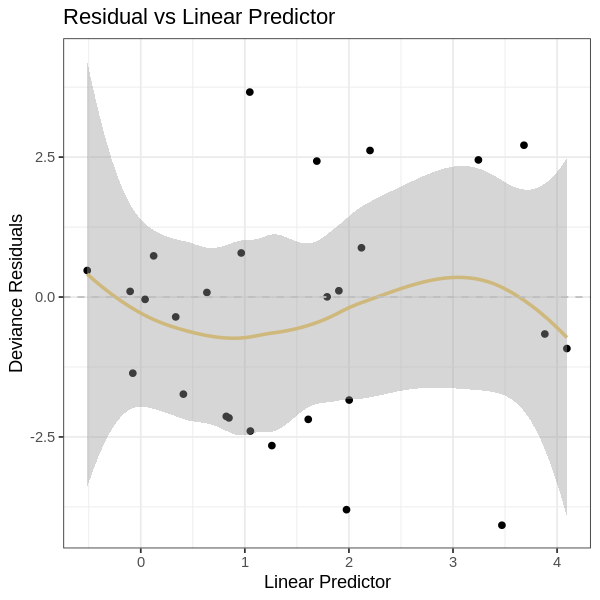

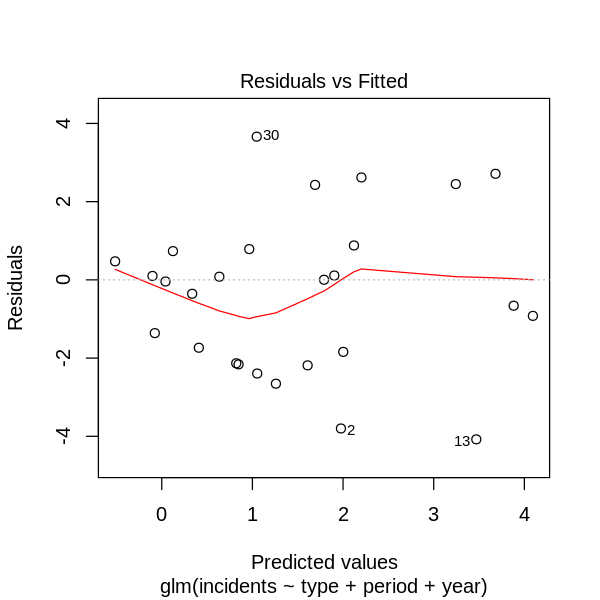

In [29]:
# Your Code Here

options(repr.plot.width = 5, repr.plot.height = 5)
p1 = ggplot(glmod.ships, aes(.fitted, .resid))+geom_point()
p1 = p1+stat_smooth(method="loess", col = "#CFB87C")+geom_hline(yintercept=0, col="grey", linetype="dashed")
p1 = p1+xlab("Linear Predictor")+ylab("Deviance Residuals")
p1 = p1+ggtitle("Residual vs Linear Predictor")+theme_bw()
p1
plot(glmod.ships,1)


<span style="color:orange">
In the poisson regression visuals above depicting the deviance residual vs the linear predictor model, we can see an uneven spread or fanning of the residuals across the predicted values which may suggest an inappropriate link function. Moreover, there seem to be outliers that may suggest that the model may need improvements.
</span>

### 2. (e) Overdispersion

For linear regression, the variance of the data is controlled through the standard deviation $\sigma$, which is independent of the other parameters like the mean $\mu$. However, some GLMs do not have this independence, which can lead to a problem called overdispersion. Overdispersion occurs when the observed data's variance is higher than expected, if the model is correct. 

For Poisson Regression, we expect that the mean of the data should equal the variance. If overdispersion is present, then the assumptions of the model are not being met and we can not trust its output (or our beloved p-values)!

Explore the two models fit in the beginning of this question for evidence of overdisperion. If you find evidence of overdispersion, you do not need to fix it (but it would be useful for you to know how to). Describe your process and conclusions.

In [30]:
# Your Code Here

overdispersion.ships = sum(residuals(glmod.ships, type = "pearson")^2)/glmod.ships$df.res
overdispersion.ships

overdispersion.ships.noyear = sum(residuals(glmod.ships.noyear, type = "pearson")^2)/glmod.ships.noyear$df.res
overdispersion.ships.noyear


[1] 5.470496

[1] 4.937925

<span style="color:orange">
The overdispersion parameter estimates are greater than one, but not by any means much greater than 1. Still, this suggests there is overdispersion in the model. After exploring the data, it is reasoned to be caused by the inclusion of outliers in the data or having an inappropriate link function, which are all examples of apparent overdispersion. Since we used all of the predictors, it would be worthwhile to check the adequacy of the link function and sift outliers out of the data. Doing this then retraining the model may show better results.
</span>